In [ ]:
#importing relevant libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
#reading and making copies of the file
df = pd.read_csv('/content/Titanic-Dataset.csv')
df1 = df.copy()

In [ ]:
#displaying first 5 rows in the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#deleting the columns Cabin, Name, SibSp, Ticket and Parch and renaming our dataset
df2= df.drop(columns = ['Cabin','Name','Ticket', 'PassengerId'])
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
#encoding Sex column
encode = LabelEncoder()
df2['Sex'] = encode.fit_transform(df['Sex'])
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [ ]:
#finding the statistical measure of our new data
df2.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#finding the shape of our new data
df2.shape

(891, 8)

In [ ]:
#replacing missing values of the Age column with the median age
median_value = df2['Age'].median()
df2['Age'].fillna(median_value)
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [ ]:
#filling the missing values of the Embarked column with the mode
#using the .mode() funtion
mode_value = df2['Embarked'].mode()
df2['Embarked'].fillna(mode_value)
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [ ]:
#checking whether all missing values have been filled
df2.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
#alternatively approach
#filling the missing values of the Embarked column with the mode using sklearn
imputer = SimpleImputer(strategy='most_frequent')
# fit_transform returns a 2D array, we need to ravel/flatten it to 1D
df2['Age'] = imputer.fit_transform(df2[['Age']]).ravel()
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,24.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [ ]:
#alternatively approach
#filling the missing values of the Embarked column with the mode using sklearn
imputer = SimpleImputer(strategy='most_frequent')
# fit_transform returns a 2D array, we need to ravel/flatten it to 1D
df2['Embarked'] = imputer.fit_transform(df2[['Embarked']]).ravel()
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,24.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [ ]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
#Encoding the embarked column
encode = LabelEncoder()
df2['Embarked'] = encode.fit_transform(df2['Embarked'])
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,24.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


<ipython-input-120-7f5018560f32>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [df['Sex'].value_counts()[0], df['Sex'].value_counts()[1]]
<ipython-input-120-7f5018560f32>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [df['Sex'].value_counts()[0], df['Sex'].value_counts()[1]]


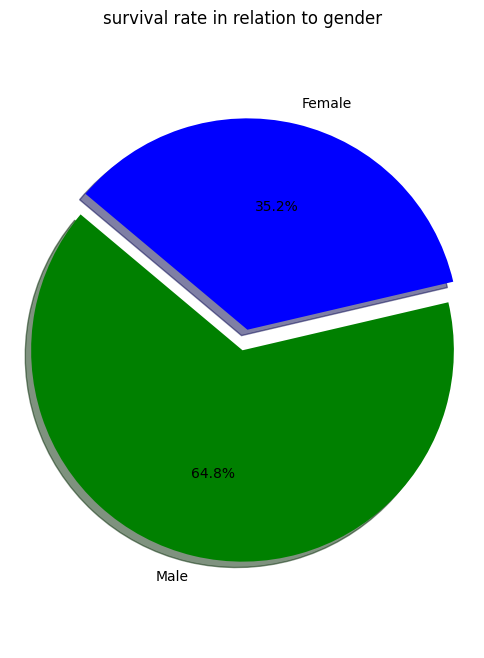

In [ ]:
#craeting a pie chart of survival rate in relation to gender
labels = ['Male', 'Female']
sizes = [df['Sex'].value_counts()[0], df['Sex'].value_counts()[1]]
colors = ['green', 'blue']
explode = (0.1, 0)

plt.figure(figsize=(6,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('survival rate in relation to gender')
plt.show()



In [ ]:
#defining our test and trained data
y = df2['Survived']
x = df2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=42)

# Define model. Specify a number for random_state to ensure same results each run
df2_model = LogisticRegression(random_state=1)
# Fit model
df2_model.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [ ]:
x_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,1,3,1,24.0,1,1,15.2458,0
439,0,2,1,31.0,0,0,10.5000,2
840,0,3,1,20.0,0,0,7.9250,2
720,1,2,0,6.0,0,1,33.0000,2
39,1,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...,...
433,0,3,1,17.0,0,0,7.1250,2
773,0,3,1,24.0,0,0,7.2250,0
25,1,3,0,38.0,1,5,31.3875,2
84,1,2,0,17.0,0,0,10.5000,2


In [ ]:
len(y_test)

179

In [ ]:
#scaling the age and fare features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[['Age', 'Fare']] = scaler.fit_transform(x_train[['Age', 'Fare']])

In [ ]:
x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,0,1,1,1.297284,0,0,-0.078684,2
733,0,2,1,-0.411428,0,0,-0.377145,2
382,0,3,1,0.272056,0,0,-0.474867,2
704,0,3,1,-0.183600,1,0,-0.476230,2
813,0,3,0,-1.702455,4,2,-0.025249,2


In [ ]:
len(x_train)

712

In [ ]:
x_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,0,1,1,1.297284,0,0,-0.078684,2
733,0,2,1,-0.411428,0,0,-0.377145,2
382,0,3,1,0.272056,0,0,-0.474867,2
704,0,3,1,-0.183600,1,0,-0.476230,2
813,0,3,0,-1.702455,4,2,-0.025249,2
...,...,...,...,...,...,...,...,...
106,1,3,0,-0.563314,0,0,-0.480162,2
270,0,1,1,-0.335486,0,0,-0.030545,2
860,0,3,1,0.955541,2,0,-0.355804,2
435,1,1,0,-1.094913,1,2,1.683201,2


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define model. Specify a number for random_state to ensure same results each run
df2_model = LogisticRegression(random_state=1)
# Fit model
df2_model.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,0,1,1,1.297284,0,0,-0.078684,2
733,0,2,1,-0.411428,0,0,-0.377145,2
382,0,3,1,0.272056,0,0,-0.474867,2
704,0,3,1,-0.183600,1,0,-0.476230,2
813,0,3,0,-1.702455,4,2,-0.025249,2


In [ ]:
y_pred = df2_model.predict(x_train.head())
y_pred
log = round(df2_model.score(x_test, y_test)* 100, 2)
log

95.53

In [ ]:
x.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.25,2


In [ ]:
x.iloc[0]

,0
Survived,0.00
Pclass,3.00
Sex,1.00
Age,22.00
SibSp,1.00
Parch,0.00
Fare,7.25
Embarked,2.00
